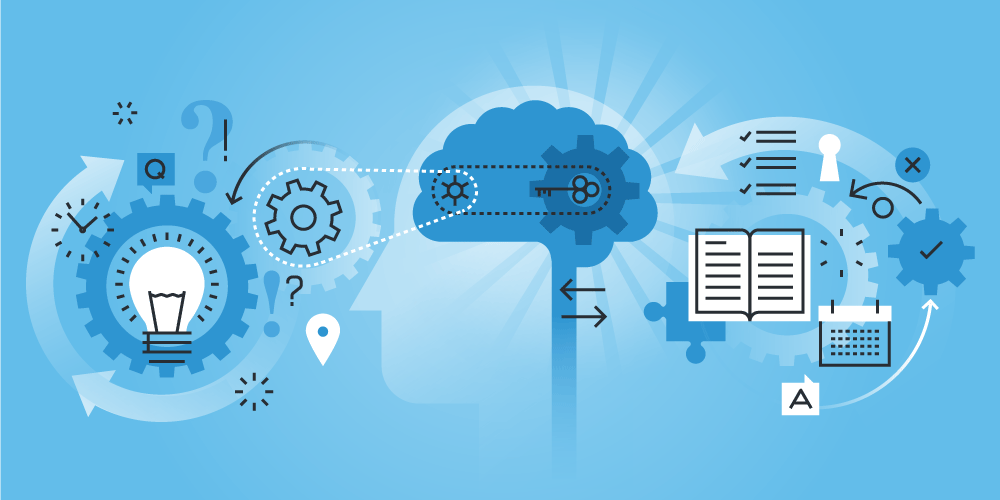

<center>
    
    
 ## Transfer Learning Apply on MNIST DataSet
    
___

<center>

##### Pablo de la Asunción Cumbrera Conde

### Índice
 - Introducción

 - Dataset y Librerías
 - Data Cleansing & Preprocessing
 - Exploratory Data Analysis (EDA)
 - Model Building
 - Conclusiones

#### Introducción
___

El Transfer Learning es una técnica aplicada al Deep Learning que consiste, esencialmente, en el aprovechamiento de una gran cantidad de información (datos) que se han aplicado sobre el entrenamiento de un modelo con el objetivo de resolver un problema y reutilizarlo en otro modelo(transferencia) para resolver otro problema con el que comparte ciertas características.

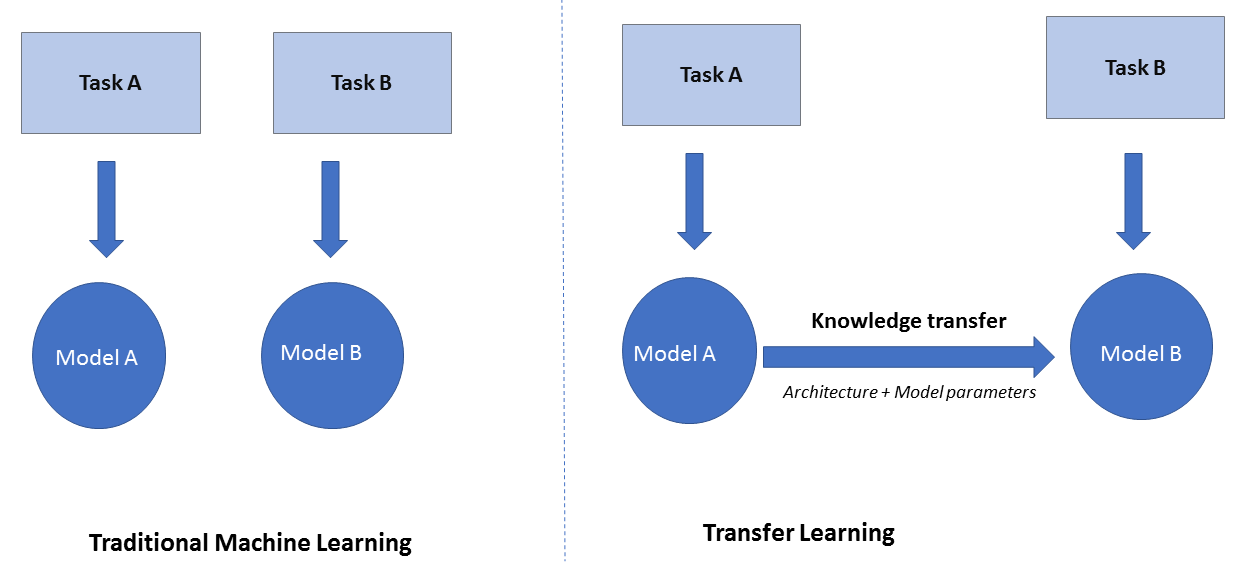

En el siguiente proyecto trataremos de realizar un aprendizaje sobre el conjunto de datos MNIST, dejando fuera del set la categoría 5 (Sandalias) y 6 (Shirt), para comprobar si tras el entrenamiento del modelo en las categorias con las que comparte características es capaz, posteriormente, de clasificarla correctamente. 

Entre los diferentes items incluimos:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal (Categoría a la que se aplica Transfer Learning)
- 6 Shirt (Categoría a la que se aplica Transfer Learning)
- 7 Sneaker 
- 8 Bag
- 9 Ankle boot


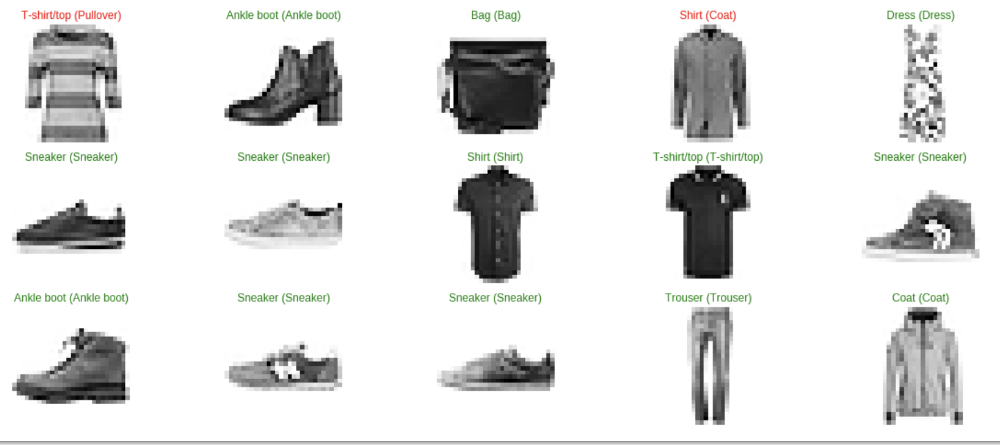

 ### Dataset y Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import visualkeras
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_data_path = 'file:///C:/Users/pablo.cumbrera/Data%20Science/Raw%20Data/fashion-mnist_train.csv'
test_data_path = 'file:///C:/Users/pablo.cumbrera/Data%20Science/Raw%20Data/fashion-mnist_test.csv'
#Convertimos los datos a float
train_data = pd.read_csv(train_data_path, dtype=np.float)
test_data = pd.read_csv(test_data_path, dtype=np.float)

- Presentación de los DataFrames

In [3]:
#Separamos los diferentes conjuntos de datos
 
# 1 Condición

nine_train = train_data[train_data["label"] !=5]
nine_test= test_data[test_data["label"] != 5]

eight_train = nine_train[nine_train["label"] !=6]
eight_test = nine_test[nine_test["label"] !=6]

#Aplicación TL

five_train = train_data[train_data["label"]==5]
five_test = test_data[test_data["label"]==5]
six_train = train_data[train_data["label"]==6]
six_test = test_data[test_data["label"]==6]

train_frames=[five_train, six_train]
test_frames=[five_test, six_test]

two_train = pd.concat(train_frames)
two_test = pd.concat(test_frames)

#Segunda aplicación TL
full_train = train_data
full_test = test_data

In [4]:
def info (arg):
    return print("Shape y unique",arg.shape,arg['label'].unique(),"\n")

#Pre
info(eight_train)
info(eight_test)

#TL
info(two_train)
info(two_test)

#2TL
info(full_train)
info(full_test)

Shape y unique (48000, 785) [2. 9. 0. 3. 4. 8. 7. 1.] 

Shape y unique (8000, 785) [0. 1. 2. 3. 8. 4. 7. 9.] 

Shape y unique (12000, 785) [5. 6.] 

Shape y unique (2000, 785) [5. 6.] 

Shape y unique (60000, 785) [2. 9. 6. 0. 3. 4. 5. 8. 7. 1.] 

Shape y unique (10000, 785) [0. 1. 2. 3. 8. 6. 5. 4. 7. 9.] 



### Data Cleansing
___

Creamos los conjuntos de datos que vamos a entrenar a continuación:

 - Llamaremos a cada subconjunto por el número de categorias que lleva

In [5]:
#Barajamos los datos y los dividimos en los diferentes sets para el modelo

def barajar (arg):
    return shuffle(arg)

eight_train = barajar(eight_train)
eight_test = barajar(eight_test)

two_train = barajar(two_train)
two_test = barajar(two_test)

full_train = barajar(full_train)
full_test = barajar(full_test)

In [6]:
#Split

def split_data(x,y):
    return x.drop('label', 1)/255, y['label']


X_train_8, y_train_8 = split_data(eight_train,eight_train)
X_test_8, y_test_8 = split_data(eight_test,eight_test)

X_train_2,y_train_2 =split_data(two_train,two_train)
X_test_2, y_test_2 = split_data(two_test,two_test)

X_train_full,y_train_full=split_data(full_train,full_train)
X_test_full, y_test_full = split_data(full_test,full_test)

In [7]:
X_train_8 = np.array([i.reshape(28,28,1) for i in X_train_8.values])
X_test_8 = np.array([i.reshape(28,28,1) for i in X_test_8.values])
X_train_2 = np.array([i.reshape(28,28,1) for i in X_train_2.values])
X_test_2 = np.array([i.reshape(28,28,1) for i in X_test_2.values])
X_train_full = np.array([i.reshape(28,28,1) for i in X_train_full.values])
X_test_full = np.array([i.reshape(28,28,1) for i in X_test_full.values])

In [8]:
def print_trshape (arg):
    return print("Shape de tensor TRAINING: ",arg.shape)
def print_teshape (arg):
    return print("Shape de tensor TESTING: ", arg.shape,"\n")

print_trshape(X_train_8)
print_teshape(X_test_8)
print_trshape(X_train_2)
print_teshape(X_test_2)
print_trshape(X_train_full)
print_teshape(X_test_full)

Shape de tensor TRAINING:  (48000, 28, 28, 1)
Shape de tensor TESTING:  (8000, 28, 28, 1) 

Shape de tensor TRAINING:  (12000, 28, 28, 1)
Shape de tensor TESTING:  (2000, 28, 28, 1) 

Shape de tensor TRAINING:  (60000, 28, 28, 1)
Shape de tensor TESTING:  (10000, 28, 28, 1) 



### Exploratory Data Analysis
___

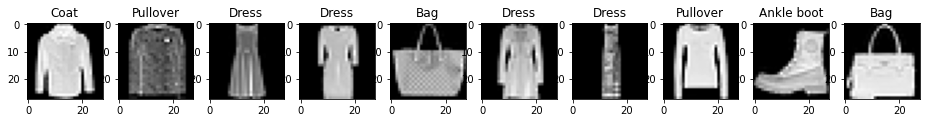

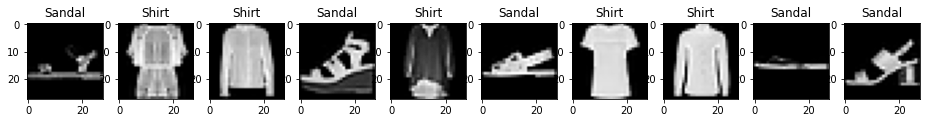

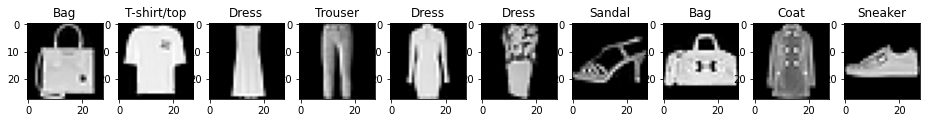

In [9]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal",
              "Shirt","Sneaker","Bag","Ankle boot"]

numero_imagenes = 10

def plot_pics(arg1, arg2):
    fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(16, 8))
    for i in range(numero_imagenes):
        axs[i].imshow(tf.reshape(arg1[i], [28, 28])*255,vmin=0, vmax=255,cmap='gray')
        axs[i].title.set_text(str(class_names[int(arg2.values[i])]))

plot_pics(X_train_8, y_train_8)
plot_pics(X_train_2,y_train_2)
plot_pics(X_train_full,y_train_full)

In [10]:
#8 Cat

dic_8={0:0, 1.0:1, 2.0:2, 3.0:3, 4.0:4, 7.0:5, 8.0:6, 9.0:7}
def dic_ev8(a):
    return dic_8[a]

y_train_8 = y_train_8.apply(dic_ev8)
y_test_8 = y_test_8.apply(dic_ev8)

In [11]:
#2 Cat

dic_2={5.0:0, 6.0:1}
def dic_ev2(a):
    return dic_2[a]

y_train_2 = y_train_2.apply(dic_ev2)
y_test_2 = y_test_2.apply(dic_ev2)

In [12]:
def token_create(arg):
    return np.array([np.eye(1,size, int(i))[0] for i in arg.values])


#Creamos un token para cada Training y Test de Y
size=8
y_train_8 =token_create(y_train_8)
y_test_8 =token_create(y_test_8)
size=2
y_train_2 =token_create(y_train_2)
y_test_2 =token_create(y_test_2)
size=10
y_train_full =token_create(y_train_full)
y_test_full =token_create(y_test_full)

In [13]:
def forma(arg):
    return print(arg.shape)

forma(y_train_8)
forma(y_test_8)
forma(y_train_2)
forma(y_test_2)
forma(y_train_full)
forma(y_test_full)

(48000, 8)
(8000, 8)
(12000, 2)
(2000, 2)
(60000, 10)
(10000, 10)


[0. 0. 0. 1. 0. 0. 0. 0.]


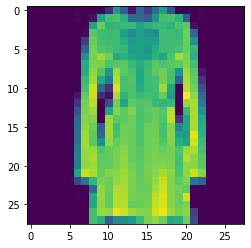

In [14]:
print(y_train_8[5])

plt.imshow(X_train_8[5])

### Model Building
___ 

- Modelo de 8 categorías

In [15]:
#8 Categorías
#AlexNet Architecture:

#Input Layer

model_input = Input(shape=(28,28,1))

#Block 1

x = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding= 'same')(model_input)
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPool2D((3,3), strides=(2,2))(x)

#Block 3

x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPool2D((2,2), strides=(2,2))(x)

#Block 4

flat = Flatten()(x)
y = Dense(512, activation='relu')(flat)
y = Dropout(0.3)(y)
y = Dense(128, activation='relu')(y)
y = Dense(128, activation='relu')(y)
y = Dropout(0.3)(y)
trainable = Dense(128, activation='relu')(y)

# Output Layer

output1 = Dense(8, activation='softmax')(trainable)

model = Model(inputs = model_input, outputs = output1)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          36928 

- Visualizamos el modelo

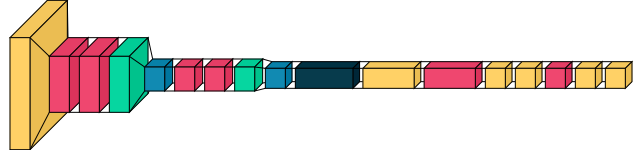

In [16]:
visualkeras.layered_view(model)

In [17]:
#Compilamos el modelo
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


print("weights : ",len(model.weights))
print("trainable weights: ", len(model.trainable_weights))
print("non trainable weights: ",len(model.non_trainable_weights))

weights :  26
trainable weights:  22
non trainable weights:  4


- Preentrenamos el modelo base

In [19]:
#Creamos un Callback 
early_stopping = EarlyStopping(monitor='loss',patience=2)

#Entremos el modelo
model.fit(X_train_8, y_train_8, epochs=10,callbacks=[early_stopping], validation_data=(X_test_8, y_test_8))

Epoch 1/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2470 - accuracy: 0.9145 - val_loss: 0.2204 - val_accuracy: 0.9200
Epoch 2/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2131 - accuracy: 0.9271 - val_loss: 0.1745 - val_accuracy: 0.9362
Epoch 3/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1919 - accuracy: 0.9332 - val_loss: 0.1791 - val_accuracy: 0.9360
Epoch 4/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.1788 - accuracy: 0.9374 - val_loss: 0.1556 - val_accuracy: 0.9423
Epoch 5/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1669 - accuracy: 0.9411 - val_loss: 0.1681 - val_accuracy: 0.9433
Epoch 6/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1597 - accuracy: 0.9434 - val_loss: 0.1767 - val_accuracy: 0.9414
Epoch 7/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1488 - accuracy: 0.9480 - val_loss: 0.1549 -

In [20]:
accuracy= model.evaluate(X_test_8,y_test_8)[1]
print ('Model accuracy:' ,accuracy*100, '%')

250/250 [==============================] - 1s 4ms/step - loss: 0.1495 - accuracy: 0.9452
Model accuracy: 94.52499747276306 %


In [21]:
#model.save(r'C:\Users\pablo.cumbrera\Documents\Data\Models\cnn_ochocategorias.h5')

- Transfer Learning through  Concat Set Up

In [22]:
#Congelamos el modelo para T.L.

model.trainable=False

#####

input_1 = keras.layers.Input(shape = (28,28,1))

model_con = model(input_1)

layer_2 = keras.layers.Dense(2, activation='relu')(model_con)

concatenate = keras.layers.concatenate([model_con, layer_2])

output = keras.layers.Dense(10, activation='softmax')(concatenate)

top_model = keras.models.Model(inputs = [input_1],outputs = [output])

top_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 8)            460520      input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 2)            18          model[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 10)           0           model[0][0]                      
                                                                 dense_5[0][0]              

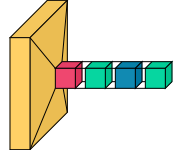

In [23]:
visualkeras.layered_view(top_model)

In [24]:
#Compilamos el modelo
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
top_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


print("weights : ",len(top_model.weights))
print("trainable weights: ", len(top_model.trainable_weights))
print("non trainable weights: ",len(top_model.non_trainable_weights))

weights :  30
trainable weights:  4
non trainable weights:  26


In [25]:
#Entremos el modelo
history1 = top_model.fit(X_train_full, y_train_full, epochs=10, validation_data=(X_test_full, y_test_full))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.2612 - accuracy: 0.2589 - val_loss: 2.1578 - val_accuracy: 0.2939
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.1222 - accuracy: 0.3139 - val_loss: 2.0242 - val_accuracy: 0.3800
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.9920 - accuracy: 0.4718 - val_loss: 1.8981 - val_accuracy: 0.5845
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.8655 - accuracy: 0.6078 - val_loss: 1.7794 - val_accuracy: 0.6569
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.7464 - accuracy: 0.6665 - val_loss: 1.6683 - val_accuracy: 0.6584
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6372 - accuracy: 0.6669 - val_loss: 1.5656 - val_accuracy: 0.7168
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.5369 - accuracy: 0.7446 - val_loss: 1.4715 - val_ac

In [26]:
accuracy= top_model.evaluate(X_test_full,y_test_full)[1]
print ('Model accuracy:' ,accuracy*100, '%')

313/313 [==============================] - 2s 5ms/step - loss: 1.2400 - accuracy: 0.7596
Model accuracy: 75.95999836921692 %


Visualizamos la curva de precisión y pérdida

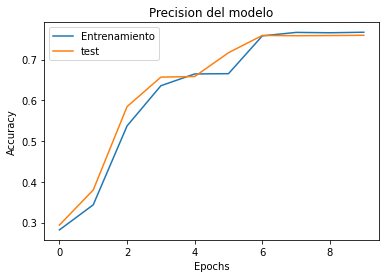

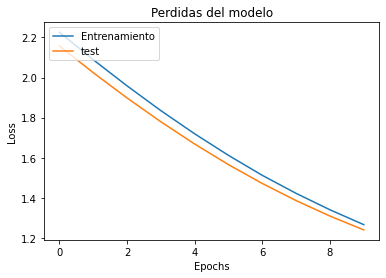

In [27]:
# Gráfica Precisión

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

# Gráfica Pérdida

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

### Conclusiones
___

- A través del aprendizaje de las ocho categorías, el modelo ha sido capaz de generalizar los resultados a dos clases con las que no había sido entrenada en primer lugar.

- Predicciones para el modelo:

In [28]:
predictions = model.predict(X_test_8)
for i in range (10):
    print(" 0 Tshirt 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Shirt 6 Sneaker 7 Bag 8 Ankle Boot 9 Sandals")
    print(predictions[i])
    print(y_test_8[i])
    print (" \n ")

 0 Tshirt 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Shirt 6 Sneaker 7 Bag 8 Ankle Boot 9 Sandals
[9.9967563e-01 4.9277293e-09 2.0394896e-04 1.2010037e-04 2.8078640e-07
 3.3783685e-09 1.7027129e-07 1.2343349e-09]
[1. 0. 0. 0. 0. 0. 0. 0.]
 
 
 0 Tshirt 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Shirt 6 Sneaker 7 Bag 8 Ankle Boot 9 Sandals
[1.2466157e-04 2.1580474e-05 3.9559352e-05 6.9727095e-05 4.4803332e-05
 7.4542624e-01 5.2502105e-04 2.5374842e-01]
[0. 0. 0. 0. 0. 0. 0. 1.]
 
 
 0 Tshirt 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Shirt 6 Sneaker 7 Bag 8 Ankle Boot 9 Sandals
[9.8901783e-06 4.2288729e-08 1.8348868e-07 6.7012692e-08 2.7256723e-08
 1.1454247e-08 9.9998975e-01 3.7929073e-08]
[0. 0. 0. 0. 0. 0. 1. 0.]
 
 
 0 Tshirt 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Shirt 6 Sneaker 7 Bag 8 Ankle Boot 9 Sandals
[5.1497528e-07 4.3991868e-09 2.6452881e-08 1.8136276e-08 1.7261252e-08
 9.9972349e-01 5.3073313e-06 2.7050669e-04]
[0. 0. 0. 0. 0. 1. 0. 0.]
 
 
 0 Tshirt 1 Trouser 2 Pullover 3 Dress 4 Coat 5 

In [29]:
predictions = top_model.predict(X_test_full)
for i in range (10):
    print(" 0 Tshirt 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Shirt 6 Sneaker 7 Bag 8 Ankle Boot 9 Sandals")
    print(predictions[i])
    print(y_test_full[i])
    print (" \n ")


 0 Tshirt 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Shirt 6 Sneaker 7 Bag 8 Ankle Boot 9 Sandals
[0.04789925 0.03909972 0.05774799 0.04623195 0.07400953 0.21823935
 0.07569176 0.29079455 0.09723219 0.0530537 ]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 
 
 0 Tshirt 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Shirt 6 Sneaker 7 Bag 8 Ankle Boot 9 Sandals
[0.07907859 0.07180422 0.20421575 0.06429054 0.14807841 0.08381578
 0.14671919 0.05970231 0.06581915 0.07647599]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 
 
 0 Tshirt 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Shirt 6 Sneaker 7 Bag 8 Ankle Boot 9 Sandals
[0.3591395  0.06138481 0.0882876  0.0558443  0.08920049 0.05064681
 0.11479712 0.07976494 0.06038936 0.04054508]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 
 
 0 Tshirt 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Shirt 6 Sneaker 7 Bag 8 Ankle Boot 9 Sandals
[0.04546283 0.08899683 0.08640752 0.11617572 0.05138396 0.11933263
 0.08869089 0.10226839 0.06511388 0.23616731]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 
 
 0 Tshirt 1 Trouser 2 Pullover 3

In [ ]:
#####################################################

___